In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata
import scprep
from sklearn.decomposition import TruncatedSVD
import torch
sc.settings.verbosity = 3    

### Load the data, transport to have row as cells and columns as genes

### Adata is the origin data and pred is data from autoencoder, pred2 from auto after perturbation, pred_comp from the competition data

In [7]:
with open("GSE126074_CellLineMixture_SNAREseq_cDNA_counts.tsv") as data:
    adata = anndata.read_csv(data, delimiter='\t')
adata=adata.T

In [8]:
pred=torch.load("pred.pt", map_location=torch.device('cpu'))

In [5]:
pred_comp=torch.load("pred_comp.pt", map_location=torch.device('cpu'))

In [12]:
pred2=torch.load("pred2.pt", map_location=torch.device('cpu'))

In [13]:
pred_comp['train'].shape

torch.Size([16394, 50])

In [14]:
pred2['train'].shape

torch.Size([1047, 50])

In [16]:
pred_comp=anndata.AnnData(pred_comp['train'].numpy())

In [19]:
pred2=anndata.AnnData(pred2['train'].numpy())

In [21]:
pred_comp

AnnData object with n_obs × n_vars = 16394 × 50

In [22]:
pred2

AnnData object with n_obs × n_vars = 1047 × 50

In [23]:
sc.pp.neighbors(pred_comp, n_pcs = 30, n_neighbors = 20)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)


In [24]:
sc.pp.neighbors(pred2, n_pcs = 30, n_neighbors = 20)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [25]:
sc.tl.umap(pred_comp)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


In [26]:
sc.tl.umap(pred2)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [27]:
sc.tl.leiden(pred_comp, key_added = "leiden_0.6")

running Leiden clustering
    finished: found 24 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:04)


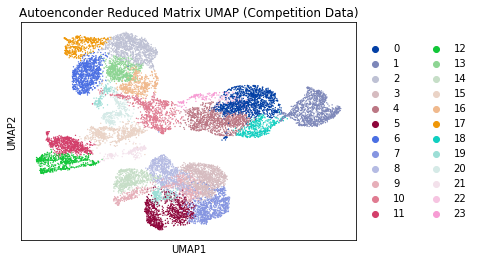

In [28]:
sc.pl.umap(pred_comp, color='leiden_0.6',title="Autoenconder Reduced Matrix UMAP (Competition Data)")

In [47]:
#pred1=anndata.AnnData(pred[0]['train'].numpy())

In [48]:
#pred1

AnnData object with n_obs × n_vars = 1047 × 50

In [29]:
adata.var

""
A1BG-AS1
A2M
A2M-AS1
A2ML1
A2ML1-AS1
...
ZZZ3
bP-21201H5.1
bP-21264C1.2
bP-2189O9.2


### Find the highest expressed gene 

normalizing counts per cell
    finished (0:00:00)


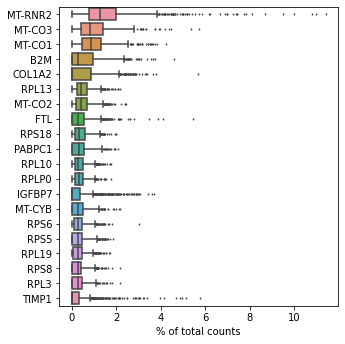

In [30]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [31]:
adata[:,adata.var_names.str.match('NBN')]

View of AnnData object with n_obs × n_vars = 1047 × 1

In [32]:
np.argmax(adata[:,adata.var_names.str.match('NBN')].X.toarray())

268

### Normalized each cell so every cell have the same counts

In [33]:
sc.pp.normalize_total(adata, target_sum=1e6)

normalizing counts per cell
    finished (0:00:00)


### log1p transform, escape the scaling

In [34]:
sc.pp.log1p(adata)

In [35]:
k562_expressed_top = ['C1ORF100', 'MTHFR', 'TOP3B', 'OR51B4', 'OR2B6', 'ZNF280A', 'ESRRB', 'ZBED9', 'CDC45', 'PLCD1', 'FBXL13', 'DSCR8', 'SH3BGR', 'FBXO42', 'C22ORF39', 'FAM178B', 'MLH1', 'EEF1E1', 'IL23A', 'ZNF311', 'PRAME', 'ZNF280B', 'C4ORF33', 'CIZ1', 'KIF5A', 'SETD8', 'STK40', 'LOC152578', 'SSX3', 'LOC100506082']

In [36]:
np.argmax(adata[:,adata.var_names.str.match('NBN')].X.toarray())

1034

In [37]:
lst= []
for s in k562_expressed_top:
  if len(adata.X[0,adata.var_names.str.match(s)])==1:
    print(s)
    lst.append(s)

MTHFR
TOP3B
OR2B6
ZNF280A
ESRRB
ZBED9
CDC45
PLCD1
FBXL13
DSCR8
FBXO42
FAM178B
MLH1
IL23A
ZNF311
ZNF280B
CIZ1
KIF5A
SETD8
STK40
SSX3


In [38]:
adata[1030:1035,adata.var_names.str.match('NBN')].X

ArrayView([[0.      ],
           [0.      ],
           [0.      ],
           [0.      ],
           [8.351914]], dtype=float32)

In [40]:
for name in lst:
    adata.X[0,adata.var_names.str.match(name)]=0

In [41]:
print(adata.X[0,adata.var_names.str.match('SSX3')])

[0.]


In [18]:
np.save("perturb_rna.npy",adata.X)

In [19]:
#sc.pp.scale(adata, max_value=10)

(1047, 18666)

In [42]:
adata[1034,adata.var_names.str.match('NBN')]=8.351914

### Add the annotation of cell types and make them into obs and obsm

In [43]:
anno=pd.read_csv("SNAREseq_types2.txt",header=None)

In [44]:
adata.obs['cell_type']=np.asanyarray(anno)

In [45]:
adata.obsm['cell_type']=np.asanyarray(anno)

In [46]:
adata.obs

,cell_type
ACTTTCTAATCA,2
GAGAGAAAACCT,3
TACGGCTGTTAT,3
GACGCGTAAGTG,2
GAAAGGACTGCA,2
...,...
GTTCTTCCTAGT,1
ATCCGTTCAACG,1
CCGACTAAGAAT,3
AAGCCTGGGGGC,1


In [49]:
pred2.obs['cell_type']=np.asanyarray(anno)
pred2.obsm['cell_type']=np.asanyarray(anno)

In [50]:
pred2.obs

,cell_type
0,2
1,3
2,3
3,2
4,2
...,...
1042,1
1043,1
1044,3
1045,1


In [51]:
adata.obs['cell_type'][1034]

4

In [53]:
sc.tl.pca(pred2, svd_solver='arpack')

computing PCA
    with n_comps=49
    finished (0:00:00)


In [54]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:04)


In [44]:
adata.obsm['X_pca'][:,0][1034]

-27.128748

In [45]:
adata.obsm['X_pca'][:,1][1034]

-16.177687

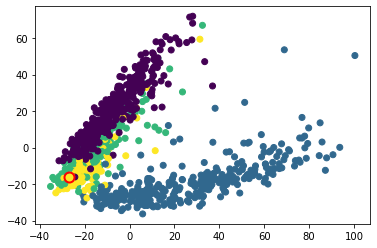

In [55]:
#sc.pl.pca(adata, color='CST3',components = ['1,2','3,4','5,6','7,8'],ncols=2)
#sc.pl.pca(adata, color='CST3',title='Original Data_SNAREseq')
labels=anno
plt.scatter(adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],c=labels)
plt.plot(-27.128748,-16.177687, 'o',
   ms=10, mec="red", mfc='none', mew=2)
plt.show()

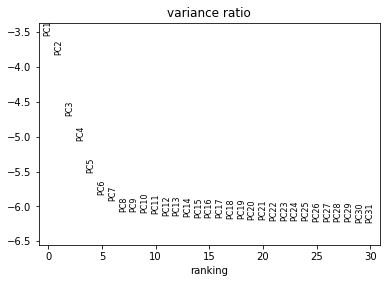

In [56]:
sc.pl.pca_variance_ratio(adata, log=True)

### Find neighbors

In [57]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=45)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [59]:
sc.pp.neighbors(pred2, n_neighbors=15, n_pcs=45)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


### Calculate Umaps

In [60]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [61]:
sc.tl.umap(pred2)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [49]:
adata.obsm['X_umap'][:,0][1034]

6.4682875

In [50]:
adata.obsm['X_umap'][:,1][1034]

16.040783

In [65]:
k562_expressed_top = ['C1ORF100', 'MTHFR', 'TOP3B', 'OR51B4', 'OR2B6', 'ZNF280A', 'ESRRB', 'ZBED9', 'CDC45', 'PLCD1', 'FBXL13', 'DSCR8', 'SH3BGR', 'FBXO42', 'C22ORF39', 'FAM178B', 'MLH1', 'EEF1E1', 'IL23A', 'ZNF311', 'PRAME', 'ZNF280B', 'C4ORF33', 'CIZ1', 'KIF5A', 'SETD8', 'STK40', 'LOC152578', 'SSX3', 'LOC100506082']

In [ ]:
CELL=0

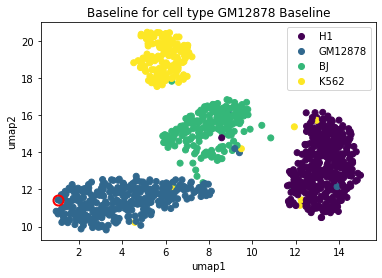

In [68]:
labels=anno
x=plt.scatter(adata.obsm['X_umap'][:,0],adata.obsm['X_umap'][:,1],c=labels)
plt.plot(adata.obsm['X_umap'][:,0][CELL],adata.obsm['X_umap'][:,1][CELL], 'o',
   ms=10, mec="red", mfc='none', mew=2)
plt.title("Baseline for cell type GM12878 Baseline")
plt.xlabel("umap1")
plt.ylabel("umap2")
classes = ["H1", "GM12878", "BJ", "K562"]
plt.legend(handles=x.legend_elements()[0],labels=classes)
plt.show()

In [64]:
CELL=0

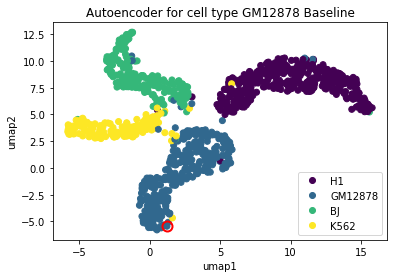

In [65]:
labels=anno
x=plt.scatter(pred2.obsm['X_umap'][:,0],pred2.obsm['X_umap'][:,1],c=labels)
plt.plot(pred2.obsm['X_umap'][:,0][CELL],pred2.obsm['X_umap'][:,1][CELL], 'o',
   ms=10, mec="red", mfc='none', mew=2)
plt.title("Autoencoder for cell type GM12878 Baseline")
plt.xlabel("umap1")
plt.ylabel("umap2")
classes = ["H1", "GM12878", "BJ", "K562"]
plt.legend(handles=x.legend_elements()[0],labels=classes)
plt.show()

In [30]:
#sc.pl.umap(adata, color='CST3',  title="UMAP")

In [31]:
adata.obsm['X_umap'].shape

(1047, 2)

In [32]:
adata.obsm['X_umap'][1000]

array([0.8299214, 1.9831951], dtype=float32)

In [24]:
#sc.tl.dendrogram(adata,groupby = "leiden_1.0")

In [95]:
#genes  = ["B2M","COL1A2","RPL13","MT-CO2"]
genes = list
sc.pl.dotplot(adata, genes,groupby=adata, dendrogram=True)

TypeError: dotplot() missing 1 required positional argument: 'groupby'

In [100]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:04)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [101]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


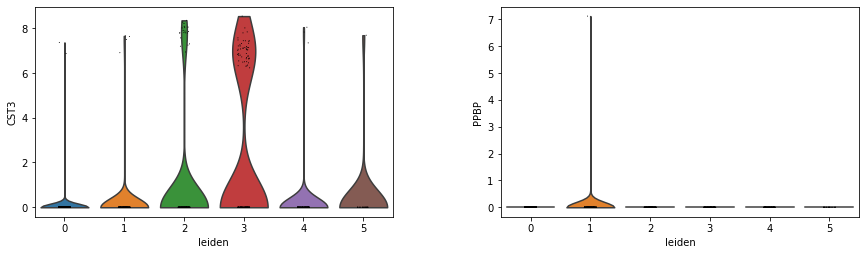

In [104]:
sc.pl.violin(adata, ['CST3', 'PPBP'], groupby='leiden')

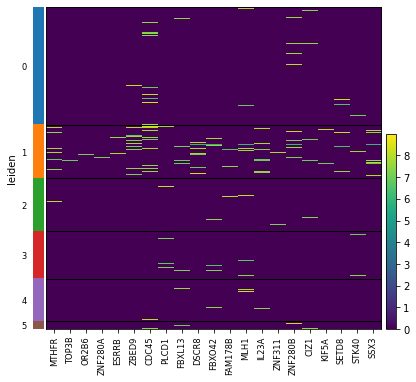

In [105]:
sc.pl.heatmap(adata,lst, groupby='leiden')

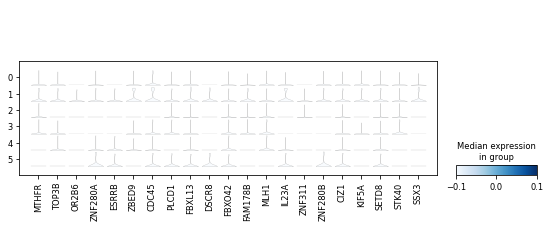

In [109]:
sc.pl.stacked_violin(adata, lst, groupby='leiden', var_group_labels=['NK'])

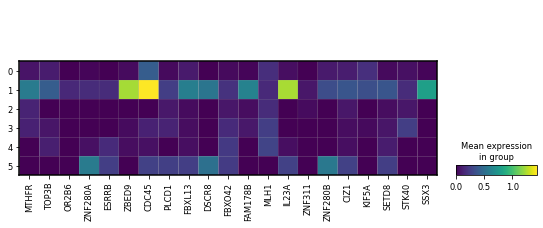

In [112]:
sc.pl.matrixplot(adata, lst, groupby='leiden')

In [33]:
adata.var_names

Index(['A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1', 'A4GALT', 'AAAS',
       'AACS', 'AACSP1', 'AADACL2-AS1',
       ...
       'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3', 'bP-21201H5.1',
       'bP-21264C1.2', 'bP-2189O9.2', 'bP-2189O9.3'],
      dtype='object', length=18666)

# Autoencoder Output

### Read in the autoencoder outpout matrix and transfer into anndata

In [34]:
auto_data=torch.load("pred.pt", map_location=torch.device('cpu'))[0]
auto_data=auto_data['train'].numpy()
print(auto_data.shape)

(1047, 50)


In [38]:
auto_data=anndata.AnnData(auto_data)

### Add the cell type labels

In [39]:
auto_data.X

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 10.02837   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 12.352412  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.20377097,
         0.        ,  9.784126  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.1602996 ,
         0.        ,  1.8635658 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.88969535,
         0.        ,  2.7898622 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.5144834 ,
         0.        ,  2.6734667 ]], dtype=float32)

In [40]:
auto_data.obs['cell_type']=np.asanyarray(anno)

In [41]:
auto_data.obsm['cell_type']=np.asanyarray(anno)

In [42]:
auto_data.obsm['cell_type']

array([[2],
       [3],
       [3],
       ...,
       [3],
       [1],
       [1]])

In [45]:
#sc.tl.pca(auto_data, svd_solver='arpack')

computing PCA
    with n_comps=49
    finished (0:00:00)


In [46]:
#sc.tl.pca(auto_data, svd_solver='arpack',n_comps=15)

computing PCA
    with n_comps=15
    finished (0:00:00)


In [49]:
sc.pp.neighbors(auto_data, n_neighbors=15, n_pcs=15)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [ ]:
# sc.tl.umap(auto_data)

### auto_data.obsm['X_umap'] has 1047 pairs of points (x,y)

In [54]:
auto_data.obsm['X_umap']

array([[-0.6792345, -1.9862556],
       [10.652844 ,  5.567401 ],
       [ 1.6930357, 11.96992  ],
       ...,
       [ 1.0284675,  5.2795153],
       [ 7.019168 , 16.08533  ],
       [ 6.2677884, 15.242341 ]], dtype=float32)

In [55]:
auto_data.obsm['X_umap'][:,0]

array([-0.6792345, 10.652844 ,  1.6930357, ...,  1.0284675,  7.019168 ,
        6.2677884], dtype=float32)

In [56]:
auto_data.obsm['X_umap'][:,1]

array([-1.9862556,  5.567401 , 11.96992  , ...,  5.2795153, 16.08533  ,
       15.242341 ], dtype=float32)

In [1]:
labels=anno
plt.scatter(auto_data.obsm['X_umap'][:,0],auto_data.obsm['X_umap'][:,1],c=labels)
plt.plot(10.652844,5.567401, 'o',
   ms=10, mec="red", mfc='none', mew=2)
plt.show()

NameError: name 'anno' is not defined

In [2]:
np.argmax(adata.X[1])

NameError: name 'np' is not defined

In [59]:
adata.X[1,9154]=0

In [86]:
print(adata.X[1,9154])

0.0
